# Demographics

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# set project root
import os
os.chdir('../..')

In [3]:
# Important! Set project root as current working directory first
from src.utils import get_project_root

root = get_project_root()
os.chdir(root)

In [4]:
index_col='answer_id'
date_cols=['sensordata_collected_at']

# Define a custom parser function for Unix timestamps
date_parser = lambda x: pd.to_datetime(float(x), unit='s')

# read in Baseline
bl = pd.read_csv('data/d01_raw/rki_heart_baseline.csv', index_col=index_col)

# read in FollowUp
fu = pd.read_csv('data/d01_raw/rki_heart_followup.csv', index_col=index_col)

## General facts about the datasets
### Baseline

In [5]:
print('Number of users and columns:\t', bl.shape)

Number of users and columns:	 (1805, 88)


## Distribution of demographics

### Age


In [6]:
bins = [10, 14, 17, 30, 40, 50, 60, 70, 80, 90, 120]
bl['age_decades'] = pd.cut(bl.alter, bins=bins)
res = pd.crosstab(bl.age_decades, bl.geschlecht)
res.to_csv('results/tables/age-by_sex.csv')
res

geschlecht,0.0,1.0,2.0
age_decades,,,
"(17, 30]",141,45,1
"(30, 40]",109,49,0
"(40, 50]",81,48,1
"(50, 60]",75,55,1
"(60, 70]",23,39,0
"(70, 80]",4,9,0
"(80, 90]",0,1,0
"(90, 120]",0,2,0


## Country

In [7]:
bl.country.value_counts()

country
DEU    675
AUT      3
MEX      1
GBR      1
AND      1
NLD      1
FRA      1
ATG      1
Name: count, dtype: int64

In [8]:
bl.country.value_counts(normalize=True)

country
DEU    0.986842
AUT    0.004386
MEX    0.001462
GBR    0.001462
AND    0.001462
NLD    0.001462
FRA    0.001462
ATG    0.001462
Name: proportion, dtype: float64

## FollowUp behaviour

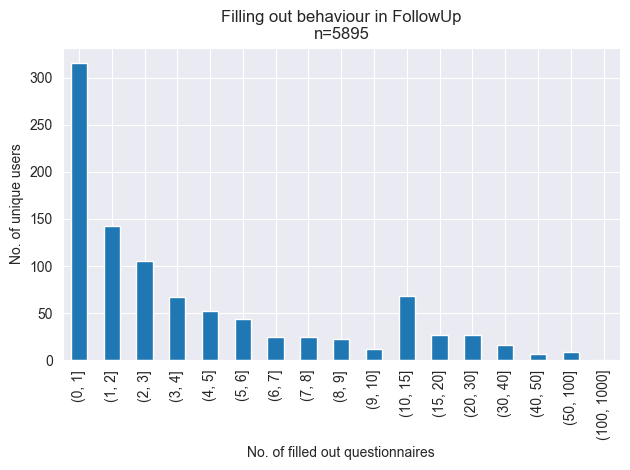

In [9]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,15, 20, 30, 40, 50, 100, 1000]
user_cnt = fu.user_id.value_counts()
pd.cut(user_cnt, bins).value_counts().sort_index().plot(kind='bar')

# Adding title and labels
plt.title('Filling out behaviour in FollowUp\nn=5895')
plt.xlabel('No. of filled out questionnaires')
plt.ylabel('No. of unique users')

plt.tight_layout()

plt.savefig('results/figures/filling_out_behaviour.svg')
# Display the plot
plt.show()

## When did users join the study?

Number of monthly active users in baseline


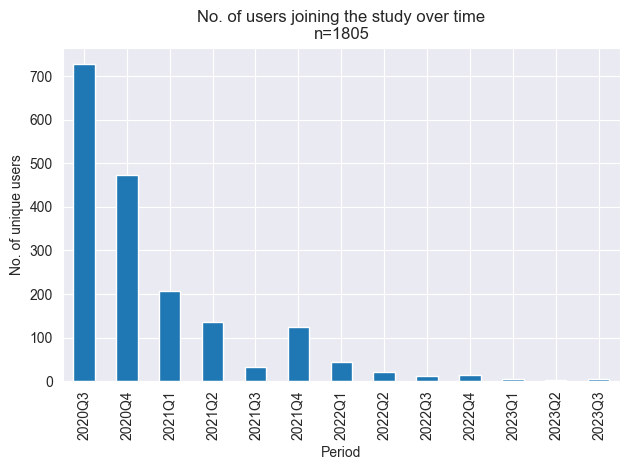

In [10]:
print('Number of monthly active users in baseline')
bl.created_at = pd.to_datetime(bl.created_at)
bl['YYYY-MM'] = bl.created_at.dt.strftime('%Y-%m')
bl['Q'] = bl.created_at.dt.to_period('Q')
bl.groupby('Q').nunique()['user_id'].plot(kind='bar')

# Adding title and labels
plt.title('No. of users joining the study over time\nn=1805')
plt.xlabel('Period')
plt.ylabel('No. of unique users')

plt.tight_layout()

plt.savefig('results/figures/users_joining_periods.svg')
# Display the plot
plt.show()

### Figure that shows how many questionnaires from how many users, grouped by bl and fu we had in the study

In [35]:
# read in other data source to correlate with our users from the app
df_cases = pd.read_csv('data/d01_raw/data.csv')

# convert to datetime to process further to 'Q' periods
df_cases.time_iso8601 = pd.to_datetime(df_cases.time_iso8601, utc=True)
df_cases['Q'] = df_cases.time_iso8601.dt.to_period('Q')

In [41]:
df_cases

,time_iso8601,source,DE-BW_cases,DE-BW_deaths,DE-BY_cases,DE-BY_deaths,DE-BE_cases,DE-BE_deaths,DE-BB_cases,DE-BB_deaths,...,DE-SN_deaths,DE-SH_cases,DE-SH_deaths,DE-ST_cases,DE-ST_deaths,DE-TH_cases,DE-TH_deaths,sum_cases,sum_deaths,Q
0,2020-03-10 11:00:00+00:00,RKI PDF,237,0,314,0,48,0,9,0,...,0,9,0,7,0,4,0,1296,0,2020Q1
1,2020-03-11 11:00:00+00:00,RKI PDF,277,0,366,0,90,0,24,0,...,0,27,0,15,0,10,0,1567,0,2020Q1
2,2020-03-12 11:00:00+00:00,RKI PDF,454,0,500,0,137,0,30,0,...,0,31,0,27,0,14,0,2369,0,2020Q1
3,2020-03-13 11:00:00+00:00,RKI PDF,454,0,558,0,174,0,44,0,...,0,48,0,42,0,29,0,3062,0,2020Q1
4,2020-03-14 11:00:00+00:00,RKI PDF,569,0,681,0,216,0,61,0,...,0,60,0,45,0,46,0,3795,0,2020Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2022-02-10 18:40:19+00:00,zeit online (gen3),1664080,13926,2159030,20858,629409,4159,409908,5095,...,14262,263000,2034,313302,4773,347892,6574,11892441,120084,2022Q1
369,2022-02-14 18:40:15+00:00,zeit online (gen3),1761578,13984,2286979,20943,646270,4167,431415,5106,...,14285,272457,2060,333375,4790,359153,6594,12516039,120628,2022Q1
370,2022-02-16 19:00:18+00:00,zeit online (gen3),1827626,14042,2359945,21027,663425,4173,446986,5121,...,14304,281452,2067,345128,4803,365544,6613,12923176,121102,2022Q1
371,2022-02-17 18:40:17+00:00,zeit online (gen3),1865152,14067,2409126,21076,671653,4175,456172,5132,...,14307,285640,2078,351819,4817,369916,6615,13159535,121364,2022Q1


In [40]:
# TODO Create that figure of new cases in this period

#
df_cases.groupby('Q')['sum_cases'].sum()

C:\Users\joa24jm\AppData\Local\Temp\ipykernel_13828\2030178857.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_cases['Q'] = df_cases.time_iso8601.dt.to_period('Q')


Q
2020Q1       575594
2020Q2      5558931
2020Q3      7760403
2020Q4     66208333
2021Q1     47861822
2021Q2    175667370
2021Q3    180205466
2021Q4    273638901
2022Q1    306220438
Freq: Q-DEC, Name: sum_cases, dtype: int64

In [11]:
# add information where this questionnaire comes from
fu['questionnaire'] = 'fu'
bl['questionnaire'] = 'bl'

# merge questionnaires
df = pd.concat([bl, fu])
df.created_at = pd.to_datetime(df.created_at)
df['Q'] = df.created_at.dt.to_period('Q')

In [12]:
res = df.groupby(['Q', 'questionnaire']).size()
# Unstack the DataFrame to make it suitable for a stacked bar chart
df_unstacked = res.unstack(level='questionnaire').fillna(0)

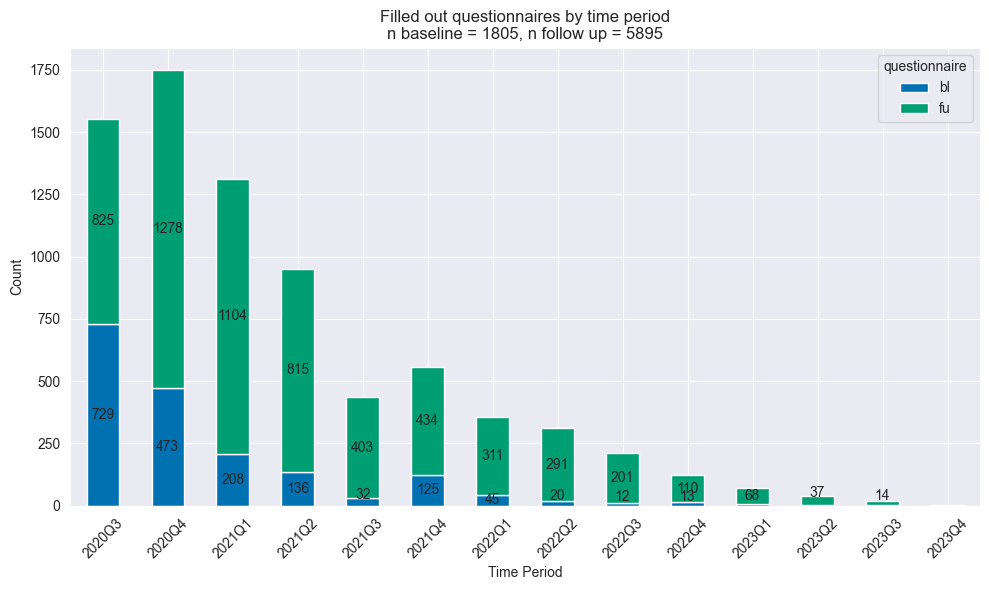

In [27]:
# set style
plt.style.use('seaborn-v0_8-colorblind')

# create fig
ax = res.unstack(level='questionnaire').plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_title('Filled out questionnaires by time period\nn baseline = 1805, n follow up = 5895')
ax.set_xlabel('Time Period')
ax.set_ylabel('Count')

# Adding data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    label_text = f'{int(height)}'

    # Check if the height of the bar is enough to fit the label
    if height > 40:  # You can adjust this threshold based on your typical data scale and aesthetics
        ax.text(x + width/2, y + height/2, label_text, ha='center', va='center')
    elif height > 10:
        ax.text(x + width/2, y + height/2, label_text, ha='center', va='bottom')
    else:
        pass

plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('results/figures/n_assessments_by_Q_and_kind.svg')

plt.show()